In [14]:
# STEP 1: Import Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from skimage import filters
from skimage.measure import shannon_entropy

%matplotlib inline




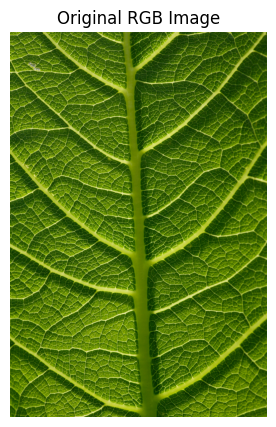

In [15]:
# Load your leaf image
img = cv2.imread("sample_image.jpeg")  # Make sure this file is in the same folder
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()


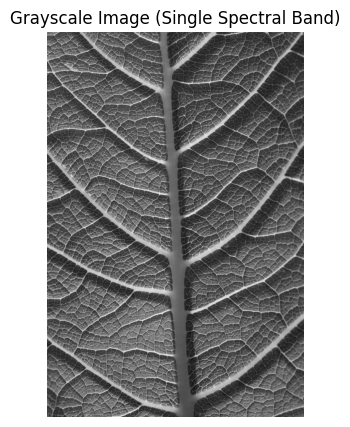

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(5,5))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image (Single Spectral Band)")
plt.axis("off")
plt.show()




In [17]:
band_gaussian = filters.gaussian(gray, sigma=1)
band_gaussian_norm = cv2.normalize(band_gaussian, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)




In [18]:
# Compute Sobel magnitude
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
band_sobel = cv2.magnitude(sobelx, sobely)
band_sobel_norm = cv2.normalize(band_sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)



In [19]:
band_canny = cv2.Canny(gray, 100, 200)  # Already 0-255



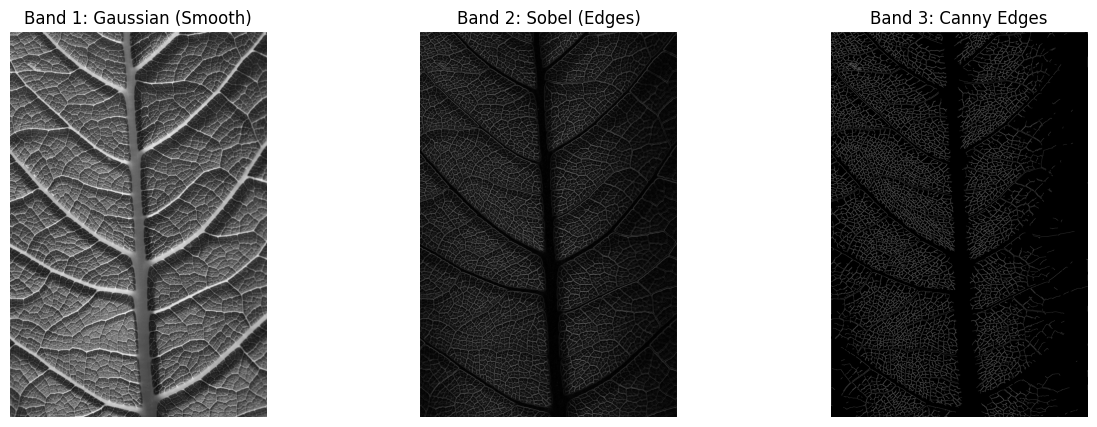

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].imshow(band_gaussian_norm, cmap='gray')
axs[0].set_title("Band 1: Gaussian (Smooth)")
axs[0].axis("off")

axs[1].imshow(band_sobel_norm, cmap='gray')
axs[1].set_title("Band 2: Sobel (Edges)")
axs[1].axis("off")

axs[2].imshow(band_canny, cmap='gray')
axs[2].set_title("Band 3: Canny Edges")
axs[2].axis("off")

plt.show()


In [21]:
bands = {
    "Gaussian": band_gaussian,
    "Sobel": band_sobel,
    "Canny": band_canny
}

stats = []
for name, band in bands.items():
    stats.append({
        "Band": name,
        "Mean": np.mean(band),
        "Std Dev": np.std(band),
        "Min": np.min(band),
        "Max": np.max(band)
    })

stats_df = pd.DataFrame(stats)
stats_df


,Band,Mean,Std Dev,Min,Max
0,Gaussian,0.368825,0.149923,0.045434,0.933296
1,Sobel,47.420645,49.731721,0.000000,465.585653
2,Canny,13.654600,57.406226,0.000000,255.000000


In [22]:
features = []
for name, band in bands.items():
    features.append({
        "Band": name,
        "Mean": np.mean(band),
        "Variance": np.var(band),
        "Entropy": shannon_entropy(band)
    })

feature_df = pd.DataFrame(features)
feature_df


,Band,Mean,Variance,Entropy
0,Gaussian,0.368825,0.022477,23.599785
1,Sobel,47.420645,2473.244057,10.104900
2,Canny,13.654600,3295.474834,0.301279


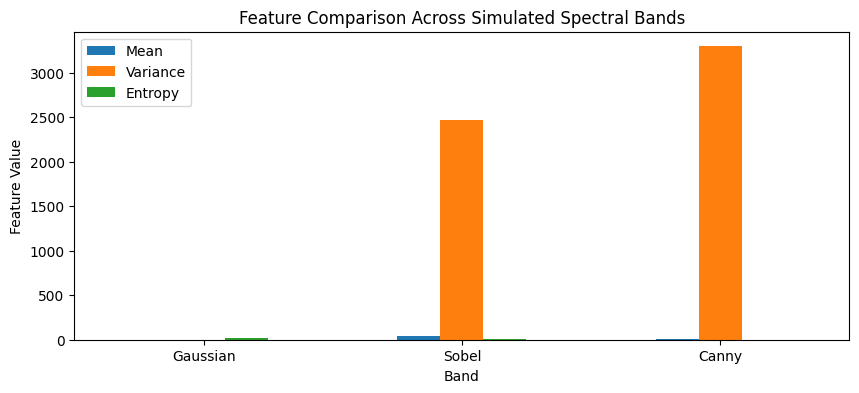

In [23]:
feature_df.set_index("Band").plot(kind="bar", figsize=(10,4))
plt.title("Feature Comparison Across Simulated Spectral Bands")
plt.ylabel("Feature Value")
plt.xticks(rotation=0)
plt.show()


In [24]:
hyperspectral_cube = np.stack([band_gaussian, band_sobel, band_canny], axis=-1)
print("Hyperspectral cube shape:", hyperspectral_cube.shape)


Hyperspectral cube shape: (4368, 2912, 3)


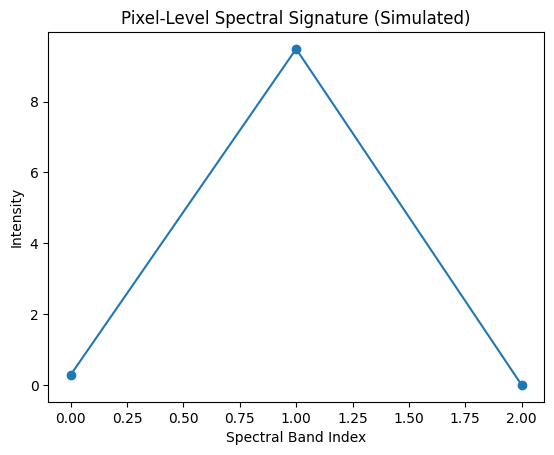

In [25]:
x, y = 100, 100  # choose any pixel
pixel_signature = hyperspectral_cube[x, y, :]

plt.plot(pixel_signature, marker='o')
plt.title("Pixel-Level Spectral Signature (Simulated)")
plt.xlabel("Spectral Band Index")
plt.ylabel("Intensity")
plt.show()
